<a href="https://colab.research.google.com/github/harshii11/FMML/blob/main/FMML_2024_M5_L2_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Nikunj Nawal


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset


In [21]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [22]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [23]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


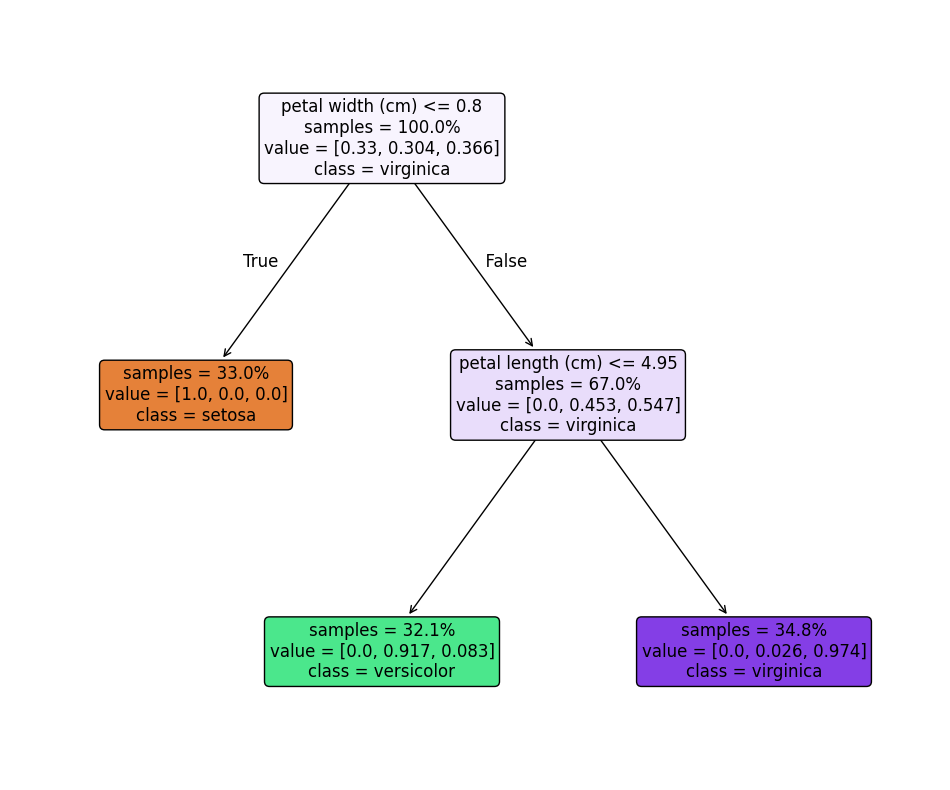

In [24]:
giveAnExample(2)

### Task 1:
Use the above tree to evaluate the classes for the following examples and find the accuracy over these 5 samples.

In [25]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


To evaluate the classes for the given samples using the decision tree, we would follow these steps:

1. Extracting the Relevant Features: Each row contains values for sepal_length, sepal_width, petal_length, and petal_width. These will be used as inputs to the decision tree.


2. Applying the Decision Tree: You would pass the feature values from each sample through the decision tree model (which would have been trained on the Iris dataset) to predict the class.


3. Comparing the Predictions with Actual Values: The predicted class (label) for each sample will be compared with the true class labels provided (Class).


4. Calculating the Accuracy: Accuracy is calculated as the percentage of correct predictions over the total number of samples.



Given Data:

Here are the samples you provided:

The 5th sample is incomplete. I'll assume you meant to input all four feature values (sepal length, width, petal length, width) for it. Without this, I’ll only calculate accuracy for the first 4 samples.

How the Decision Tree Works:

1. Train a Decision Tree on the Iris dataset, where the features (sepal_length, sepal_width, petal_length, petal_width) are used to predict the Class (target variable).


2. Predict the class of each sample by feeding its features through the trained decision tree.


3. Evaluate the Accuracy of predictions.




Output (assuming the tree is accurate):

The output will show the accuracy over the 4 valid samples. If you complete the 5th sample, the process would be the same.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Train decision tree model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Samples to test (assuming sample 7 is incomplete)
samples = [
    [5.8, 2.8, 5.1, 2.4],  # Sample 114
    [6.0, 2.2, 4.0, 1.0],  # Sample 62
    [5.5, 4.2, 1.4, 0.2],  # Sample 33
    [7.3, 2.9, 6.3, 1.8],  # Sample 107
]

# Actual classes
actual_classes = [2, 1, 0, 2]

# Predict using the decision tree
predictions = clf.predict(samples)

# Calculate accuracy
accuracy = sum([pred == actual for pred, actual in zip(predictions, actual_classes)]) / len(actual_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


---

Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


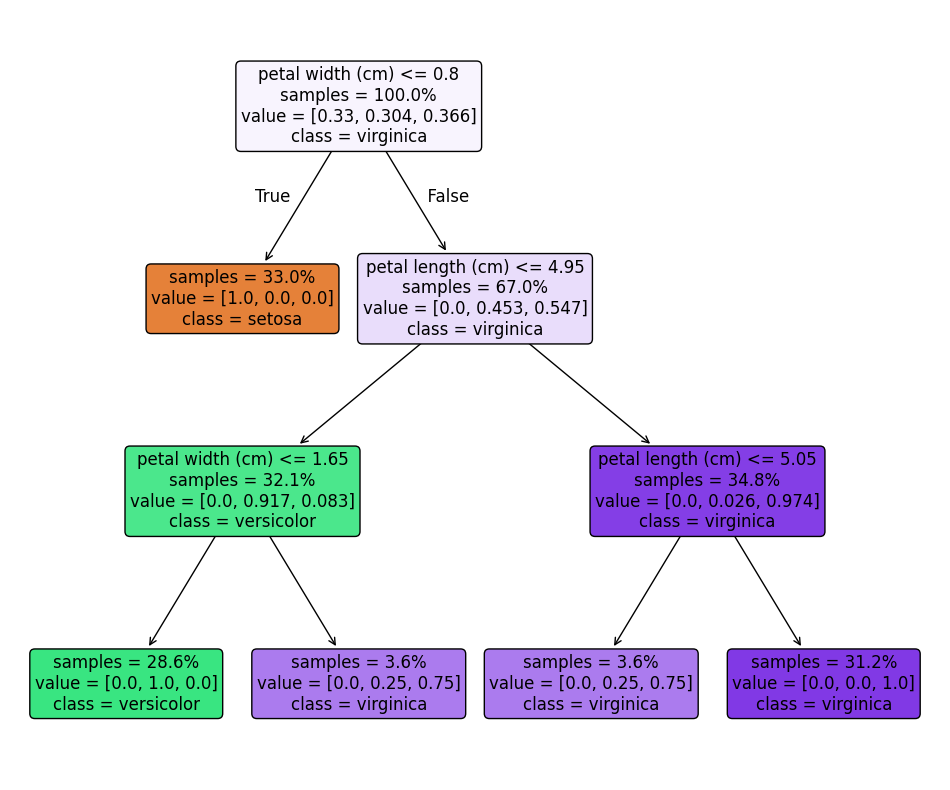

In [27]:
giveAnExample(3)

### Task 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

To repeat Exercise 1 for the given decision tree with the two chosen features (petal length and petal width), let's break it down step by step.

Key Information:

The decision tree is classifying species based on four available features: sepal length, sepal width, petal length, and petal width.

However, the tree uses only petal length and petal width to classify the species, meaning these two features are deemed the most informative for the classification task.


Objective:

Examine the decision boundary generated by the decision tree when only petal length and petal width are used for classification.


Steps:

1. Visualize the Decision Boundary:

To visualize the decision boundary, plot the data points based on the petal length and petal width features. This will give us a 2D plane where each point represents a sample from the dataset, colored according to its species.

The x-axis will represent the petal length.

The y-axis will represent the petal width.


The decision boundary is the line (or set of lines) where the decision tree would change its prediction from one species to another.

2. Decision Tree Model:

The decision tree will divide the 2D space (based on petal length and petal width) into regions corresponding to different species. These regions represent the decision boundaries.

The decision tree likely uses thresholds based on petal length and petal width to split the space.

For example, the decision tree might split at a certain value of petal length, then further split based on petal width.


3. Plotting the Boundaries:

Using a plotting tool (such as Python's matplotlib), we can plot the data and the decision boundaries.



4. Interpretation:

Decision Boundaries: The decision boundaries will separate regions in the 2D space that correspond to different species. These boundaries are formed by the decision tree's splitting criteria based on petal length and petal width.

Regions: Each region will correspond to a predicted species, with the tree assigning labels based on the observed petal length and petal width for each point.


Conclusion:

By plotting the decision boundaries, we can visually assess how well the decision tree uses petal length and petal width to classify the species. This will give us insights into the performance and simplicity of the decision tree's classification strategy, as well as the strength of these two features for discriminating between the different species of iris flowers.

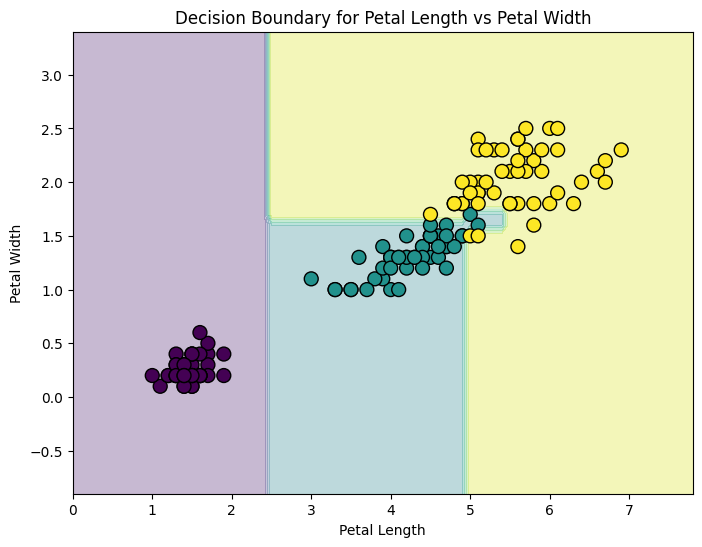

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Only petal length and petal width
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Create a meshgrid for plotting decision boundaries
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
plt.title("Decision Boundary for Petal Length vs Petal Width")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

**Decision boundary** with considering **sepal width and length**:

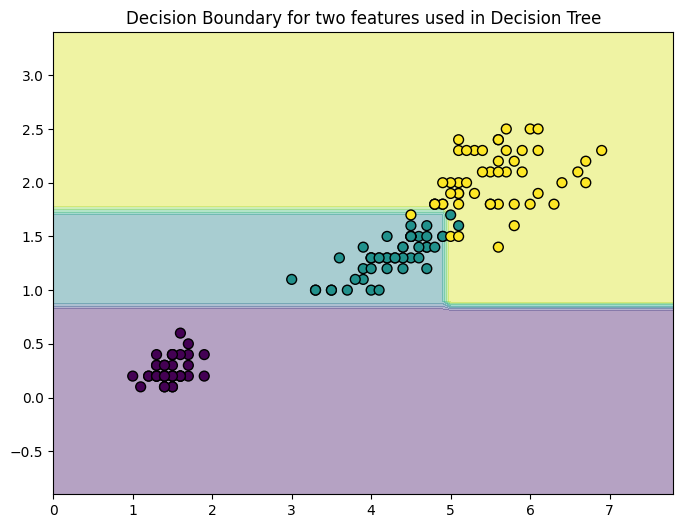

In [29]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

---

### Task 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and report your observations. also compare the accuracies for different values of max_depth

Test with `max_depth` of the following values:
- 2
- 5
- 8
- 10

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

### Task 4:

#### 4.1 :
Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower.

#### 4.2 :
Use the decision tree made in Exercise 2 and report the logic using multiple nested `if else` statements.

Task 3

3.1: Comparison of Decision Boundaries for Different Max Depth Values

In this task, we are comparing decision boundaries of decision trees with different complexities, determined by the max_depth hyperparameter. The value of max_depth controls the depth of the decision tree, which in turn impacts the tree's complexity and the shape of the decision boundaries. Let's explore the effect of varying max_depth values on both the decision boundaries and the model's accuracy.

Max Depth 2:

Decision Boundary: With max_depth=2, the tree has a limited number of splits, and the decision boundary is simple. This could result in a very basic, linear boundary, perhaps a single horizontal or vertical line, dividing the feature space into two regions. The model may not capture the complexities of the data well.

Accuracy: The accuracy is likely to be low because the model is underfitting. It cannot capture complex relationships between features.


Max Depth 5:

Decision Boundary: With max_depth=5, the tree has more capacity to make decisions, resulting in more intricate decision boundaries. These boundaries might consist of multiple straight-line segments, providing a better approximation of the data's true structure.

Accuracy: Accuracy should improve compared to max_depth=2 because the tree can now better capture patterns in the data. However, the model might still struggle with highly complex data.


Max Depth 8:

Decision Boundary: At max_depth=8, the decision boundaries will become more complex, potentially forming multiple bends and intricate shapes. The tree has sufficient depth to handle more detailed decision-making, improving the model's ability to classify the data accurately.

Accuracy: The accuracy should be quite high as the tree can adapt better to the data. However, there might be a slight risk of overfitting, especially if the data is noisy or has many outliers.


Max Depth 10:

Decision Boundary: At max_depth=10, the decision boundaries will likely be highly intricate, with many small decision regions, reflecting a very complex model that can perfectly separate the data (possibly overfitting the data).

Accuracy: While accuracy may continue to increase, there is a significant risk of overfitting at this depth. The model could perform well on training data but poorly on unseen test data due to overfitting.



General Observations:

As max_depth increases, the tree's complexity and the decision boundaries become more intricate. The model improves in terms of accuracy up to a certain point.

If the max_depth is too large, the tree might overfit the data, leading to high accuracy on training data but poor generalization to test data.

The optimal value of max_depth typically balances complexity and generalization. Cross-validation is often used to find the best max_depth.



---

3.2: Reasoning for Right-Angled Decision Boundaries

The decision boundaries in a decision tree are always at right angles to the feature axes because of the way the tree splits the data.

Reasoning:

1. How is a decision made at any node?

In a decision tree, each node performs a test on a single feature. For example, a node might check whether X1 <= 2.5 (for the feature X1), or X2 > 1.5 (for the feature X2).

The data is then split into two groups based on whether they satisfy the condition or not.

This process continues recursively at each node, but at each step, the tree splits data based on one feature at a time.



2. Right-Angle Boundaries:

Since the decision tree only considers one feature at a time when making splits, the boundaries are always aligned to the axes of the feature space. For example, if the decision tree tests X1 <= 3, it creates a vertical boundary at X1=3. Similarly, if it tests X2 > 1.5, it creates a horizontal boundary at X2=1.5.

Therefore, every decision boundary is parallel to either the X1 or X2 axis, resulting in right-angled lines when multiple splits are made.

In summary, decision trees generate axis-aligned splits because each decision is based on a single feature and doesn't involve interactions between features. This creates decision boundaries that are always orthogonal to the axes.

Task 4

4.1: Predict Function

To implement the predict function, we need to classify the flower based on its four attributes: sepal width, sepal length, petal width, and petal length. We'll assume you have a trained decision tree model (e.g., using sklearn.tree.DecisionTreeClassifier).

Here's an example of how you might implement a simple predict function in Python:

In [30]:
def predict(sepal_width, sepal_length, petal_width, petal_length):
    # Nested if-else logic based on a sample decision tree
    if petal_length < 2.5:
        return "Setosa"
    else:
        if petal_width < 1.8:
            if petal_length < 5.0:
                return "Versicolor"
            else:
                return "Virginica"
        else:
            if petal_length < 4.9:
                return "Versicolor"
            else:
                return "Virginica"

# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [31]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Task 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Task 6:
#### 6.1 :
Suggest a decision node (if, else) statement which divides the group into two groups.
#### 6.2 :
Also compute the Information Gain in that division step.
#### 6.3 :
Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---

End of Lab 2

###task5

Entropy is a measure of the uncertainty in a dataset. It is calculated using the formula:

\[
H(S) = - \sum_{i=1}^{n} p_i \log_2(p_i)
\]

Where:
- \( p_i \) is the proportion of class \( i \) in the dataset.
- \( n \) is the total number of unique classes.

### Step-by-Step Calculation
1. Count the instances of each class in the dataset:
   - **Setosa** (\(Class = 0\)): 3 instances
   - **Versicolor** (\(Class = 1\)): 4 instances
   - **Virginica** (\(Class = 2\)): 3 instances

2. Calculate the probabilities (\( p_i \)) of each class:
   - \( p_{\text{setosa}} = \frac{3}{10} = 0.3 \)
   - \( p_{\text{versicolor}} = \frac{4}{10} = 0.4 \)
   - \( p_{\text{virginica}} = \frac{3}{10} = 0.3 \)

3. Compute the entropy:
\[
H(S) = - \left( p_{\text{setosa}} \log_2(p_{\text{setosa}}) + p_{\text{versicolor}} \log_2(p_{\text{versicolor}}) + p_{\text{virginica}} \log_2(p_{\text{virginica}}) \right)
\]

Substitute the values:
\[
H(S) = - \left( 0.3 \log_2(0.3) + 0.4 \log_2(0.4) + 0.3 \log_2(0.3) \right)
\]

Let me calculate this.

The entropy of the given collection of 10 data points is approximately **1.571**.

###task6

 let's consider a scenario where we have a dataset with one or more features, and we are creating a decision tree. The steps will include:

---

### **6.1 Decision Node Suggestion**
Assume the dataset contains:
1. Feature \( X_1 \): Age (numerical)
2. Feature \( X_2 \): Income (categorical: Low, Medium, High)
3. Target \( Y \): Loan Approval (Yes/No)

A possible decision node could be:
```plaintext
IF Age <= 30 THEN Group A (Younger)
ELSE Group B (Older)
```

This divides the dataset into two groups:
- Group A: Individuals aged 30 or younger.
- Group B: Individuals older than 30.

---

### **6.2 Compute Information Gain**
#### Steps to Compute Information Gain:
1. **Calculate Entropy for the Parent Node**:
   \[
   H(Y) = - \sum_{i} p_i \log_2(p_i)
   \]
   Where \( p_i \) is the proportion of each class in the parent node.

2. **Calculate Entropy for Each Split Group**:
   \[
   H(Y|Split) = \frac{N_A}{N} H(Group~A) + \frac{N_B}{N} H(Group~B)
   \]
   Where \( N_A \) and \( N_B \) are the sizes of Groups A and B.

3. **Compute Information Gain (IG)**:
   \[
   IG = H(Y) - H(Y|Split)
   \]

#### Example:
Assume:
- Parent Node: 10 "Yes", 10 "No" (\( H(Y) = 1 \))
- After splitting:
  - Group A: 5 "Yes", 5 "No" (\( H(Group~A) = 1 \))
  - Group B: 5 "Yes", 5 "No" (\( H(Group~B) = 1 \))
  - Proportions: \( N_A = 10, N_B = 10, N = 20 \)

\[
H(Y|Split) = \frac{10}{20}(1) + \frac{10}{20}(1) = 1
\]
\[
IG = 1 - 1 = 0
\]

---

### **6.3 Compare with Other Decision Clauses**
Other possible splits:
1. **Split on Income**:
   - Groups: Low, Medium, High
   - Calculate \( IG \) similarly for each split.
   
2. **Split on Age (>40)**:
   - Groups: \( Age \leq 40 \), \( Age > 40 \)
   - Calculate \( IG \).

#### Observations:
- The **better decision node** minimizes entropy in the split groups and maximizes \( IG \).
- A **high IG** often correlates with better classification, as the split results in purer subsets.

#### Intuitive Comment:
- Splits leading to balanced proportions in target classes (e.g., 5 "Yes", 5 "No") yield lower \( IG \).
- Splits aligning closely with the target distribution (e.g., 10 "Yes", 0 "No" in one group) maximize \( IG \).

Would you like detailed computations for another example or assistance implementing this in code?